In [1]:
#import des librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import scipy as sci
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn import linear_model
from sklearn import metrics                         
from sklearn.linear_model import  LogisticRegression # modèle utilisé 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score # metrique de la regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
# Import du fichier
df= pd.read_csv('df_ml.csv', sep=';')

In [3]:
df["grave"].value_counts(normalize=True)

grave
0    0.459728
1    0.390658
2    0.130079
3    0.019534
Name: proportion, dtype: float64

In [4]:
df['grave_new'] = df['grave']

In [5]:
# Création de 2 classes: la classe indemne(0) et la classe blessée (1 = 1,2,3)
for i,row in df.iterrows():
    if row ["grave"] == 0:
        df.at[i,"grave_new"] = 0
    else:
        df.at[i,"grave_new"] = 1
        
df['grave_new'].value_counts(normalize =True)

grave_new
1    0.540272
0    0.459728
Name: proportion, dtype: float64

In [6]:
df['sexe'].value_counts(normalize =True)

sexe
 1    0.670095
 2    0.311597
-1    0.018308
Name: proportion, dtype: float64

In [7]:
# Modification du type de la colonne"sexe"
df['sexe_new'] = df['sexe']
for i,row in df.iterrows():
    if row ["sexe"] == 1:
        df.at[i,"sexe_new"] = 0
        
    else:
        df.at[i,"sexe_new"] = 1
        
df['sexe_new'].value_counts(normalize =True)

sexe_new
0    0.670095
1    0.329905
Name: proportion, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309050 entries, 0 to 309049
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   luminosité     309047 non-null  object
 1   intersection   309036 non-null  object
 2   collision      309050 non-null  object
 3   agglomération  309050 non-null  object
 4   route          309050 non-null  object
 5   profil         309050 non-null  object
 6   courbe         309050 non-null  object
 7   surface        309050 non-null  object
 8   amenagement    309050 non-null  object
 9   categorie      309050 non-null  object
 10  choc1          309050 non-null  object
 11  manoeuvre      309050 non-null  object
 12  grave          309050 non-null  int64 
 13  sexe           309050 non-null  int64 
 14  âge            309050 non-null  object
 15  trajet         309050 non-null  object
 16  secu           309050 non-null  object
 17  grave_new      309050 non-null  int64 
 18  sexe

In [9]:
df_clean = df.drop(columns =["grave","sexe"])

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309050 entries, 0 to 309049
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   luminosité     309047 non-null  object
 1   intersection   309036 non-null  object
 2   collision      309050 non-null  object
 3   agglomération  309050 non-null  object
 4   route          309050 non-null  object
 5   profil         309050 non-null  object
 6   courbe         309050 non-null  object
 7   surface        309050 non-null  object
 8   amenagement    309050 non-null  object
 9   categorie      309050 non-null  object
 10  choc1          309050 non-null  object
 11  manoeuvre      309050 non-null  object
 12  âge            309050 non-null  object
 13  trajet         309050 non-null  object
 14  secu           309050 non-null  object
 15  grave_new      309050 non-null  int64 
 16  sexe_new       309050 non-null  int64 
dtypes: int64(2), object(15)
memory usage: 40.1+ MB


In [11]:
# Nous stockons le dataframe dans 2 tableaux numpy  x et y
X = df_clean.drop("grave_new", axis =1)
y = df_clean["grave_new"]   # Récupération de la target (grave)
#vérifiez les dimensions de X et y 
print(X.shape)
print(y.shape)

(309050, 16)
(309050,)


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
col_a_encoder = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), col_a_encoder)], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print (X)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]


In [13]:
X.shape

(309050, 29)

In [14]:
print(y.dtype)
print(y.unique())


int64
[1 0]


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
# on divise notre jeu de données en train et test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify = y) 

In [17]:
# vérifiez le nombre de données y dans chaque jeu (train et test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(247240, 29)
(247240,)
(61810, 29)
(61810,)


In [18]:
#Nous instancions une régression logistique sans pénalité c.-à-d. sans réaliser de régularisation pour l'instant
# vous ajouterez uniquement comme hyperparamètre random_state = 0
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
#instanciation
stds = preprocessing.StandardScaler()
#transformation
X1_train = stds.fit_transform(X_train)
# imprimer les statistique de description à l'aide de la librairie scipy
print(sci.stats.describe(X1_train,axis=0,ddof=0))
#remarquez que les variables sont bien de moyenne nulle et d’écart-type unitaire.

DescribeResult(nobs=247240, minmax=(array([-2.95129739e+00, -3.48340439e-03, -1.02432091e+00, -6.96693559e-03,
       -2.23115337e+00, -1.73846111e-01, -7.87369000e-01, -8.27272488e-01,
       -7.76288566e-01, -2.20067794e+00, -2.36898914e+00, -1.99818173e+00,
       -9.06740160e+00, -4.74767511e-01, -1.52538025e+00, -2.48640790e-01,
       -2.55285808e-01, -1.32692529e+00, -3.84602741e-01, -1.35721593e+00,
       -1.82745805e-01, -4.67967842e-01, -1.17339278e+00, -4.34066675e-01,
       -2.90819947e-01, -4.36295237e-01, -1.26110760e+00, -5.01269953e-01,
       -7.01301683e-01]), array([3.38834033e-01, 2.87075484e+02, 9.76256556e-01, 1.43535129e+02,
       4.48198682e-01, 5.75221380e+00, 1.27005254e+00, 1.20879156e+00,
       1.28818077e+00, 4.54405427e-01, 4.22120973e-01, 5.00454982e-01,
       1.10285178e-01, 2.10629409e+00, 6.55574243e-01, 4.02186625e+00,
       3.91717820e+00, 7.53621933e-01, 2.60008547e+00, 7.36802433e-01,
       5.47208183e+00, 2.13689897e+00, 8.52229553e-01, 2.3

In [20]:
model_std = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
model_std.fit(X1_train, y_train)
coef = model_std.coef_

/home/isalog/Brief13_clean/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [21]:
# on fait de même pour la constante (l'ordonnée à l'origine)
interceptUnStd =model_std.intercept_ + np.sum(model_std.coef_[0]*(-stds.mean_/stds.scale_))
print(interceptUnStd)

[1.25512518]


In [22]:
# nous devons appliquer la même standardisation sur les valeurs du test set ! 
#transformation de l'échantillon test
X_test_std = stds.transform(X_test)
# on applique le modèle à l'échantillon
y_pred = model_std.predict(X_test_std)
#print(np.unique(y_pred,return_counts=True))

[[20880  7536]
 [11116 22278]]


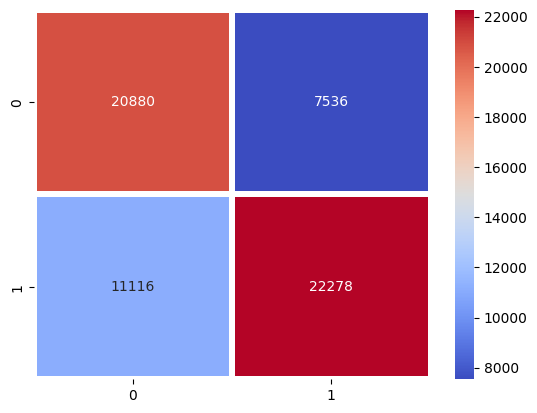

In [23]:
# affichez la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_heatmap = pd.DataFrame(cm)
sns.heatmap(cm_heatmap, annot=True, cmap="coolwarm", fmt="d", linewidths=4)
plt.show()

In [24]:
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.698236531305614


In [25]:
#affichez le rapport de classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69     28416
           1       0.75      0.67      0.70     33394

    accuracy                           0.70     61810
   macro avg       0.70      0.70      0.70     61810
weighted avg       0.70      0.70      0.70     61810



In [26]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred,pos_label=1)

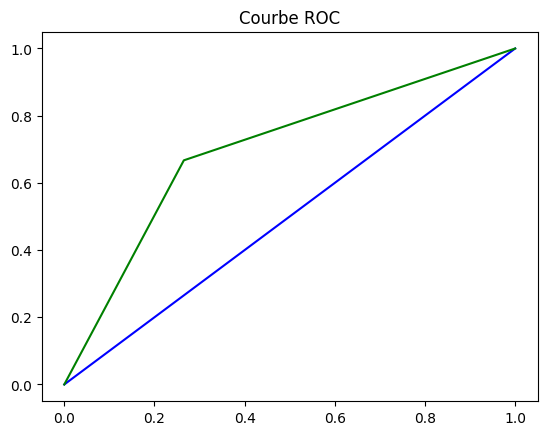

In [27]:
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fpr,tpr,"g")
plt.title("Courbe ROC")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(X)

feature_names = X.columns 
X_scaled = scaler.fit_transform(X)
model_std = LogisticRegression()
model_std.fit(X_scaled, y)
std_coefficients = model_std.coef_[0]
for feature, coef in zip(feature_names, std_coefficients):
    print(f"{feature}: {abs(coef)}")


0: 0.06379159673612646
1: 0.010883078863100458
2: 0.04292585839782634
3: 0.0011615177994597427
4: 0.055754124086647316
5: 0.14831563312686324
6: 0.1710311251408029
7: 0.03450252155617346
8: 0.08424560025877861
9: 0.0031725028904441206
10: 0.05296599442489634
11: 0.014586841831779976
12: 0.017331272054047612
13: 0.18045809332144874
14: 0.3399569178280443
15: 0.10053175959993174
16: 0.02132382096080597
17: 0.13770540773405499
18: 0.03237215994360046
19: 0.02114817156879444
20: 0.02223618903531079
21: 0.12983075129962693
22: 0.12472503702855116
23: 0.03389824987390707
24: 0.27152263886539596
25: 0.05935525763499912
26: 1.762673564688295
27: 0.8563315775545597
28: 0.22802968146569252


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Récupérer les noms des colonnes originales
original_feature_names = df_clean.drop("grave_new", axis=1).columns

# Obtenir les noms des colonnes encodées
encoded_feature_names = ct.get_feature_names_out()

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajuster le modèle
model_std = LogisticRegression()
model_std.fit(X_scaled, y)

# Obtenir les coefficients standardisés
std_coefficients = model_std.coef_[0]

# Créer un dictionnaire pour stocker l'importance de chaque caractéristique originale
feature_importance = {feature: 0 for feature in original_feature_names}

# Calculer l'importance pour chaque caractéristique originale
for encoded_feature, coef in zip(encoded_feature_names, std_coefficients):
    original_feature = encoded_feature.split('__')[0]
    feature_importance[original_feature] += abs(coef)

# Normaliser les importances en pourcentages
total_importance = sum(feature_importance.values())
feature_importance_percent = {k: (v / total_importance) * 100 for k, v in feature_importance.items()}

# Trier et afficher les résultats
sorted_importance = sorted(feature_importance_percent.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.2f}%")


KeyError: 'encoder'